___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [ ]:
conda install tensorflow-gpu

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[9].shape

# 28 x 28'lik resimler var elimizde. tek kanallı ! renkli resim olsaydı (28,28,3) olurdu.

(28, 28)

In [6]:
X_train[9]

# piksel değerlerini görüyoruz : 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

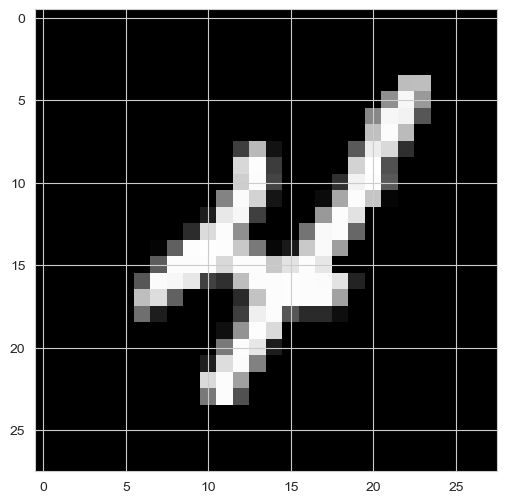

In [7]:
plt.imshow(X_train[9],cmap='gray')

# bize gelen resimler burada  array şeklinde olduğundan bunu plt.imshow ile görselleştirebiliyoruz ama gelen resimler array 
# şeklinde olmasaydı eğer önce arraye çevirip ardından görselleştirebilecektik.
# cmap=None olursa yalancı bir renklendirme yapar .Ama ben gray-scale olduğunu bildiğimden bunu belirtiyorum.

<Axes: >

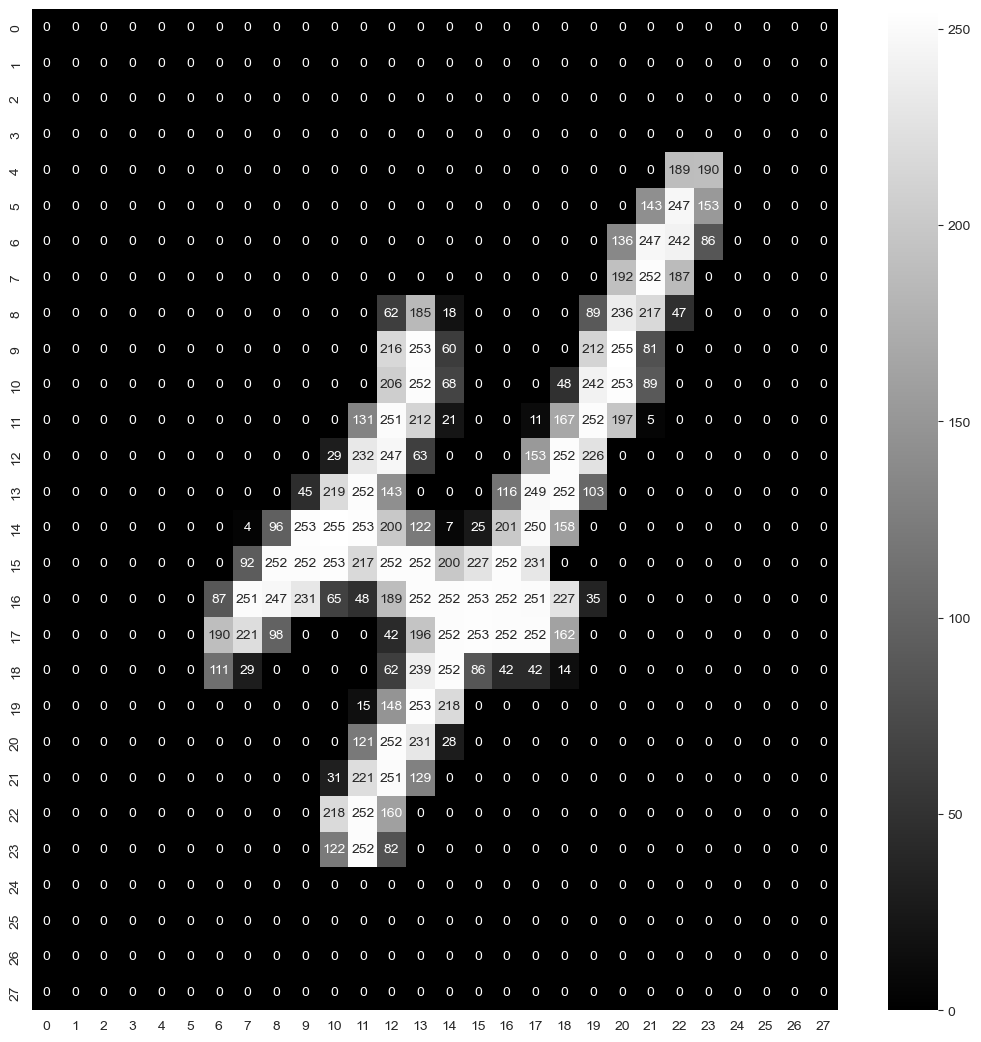

In [8]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[9], annot=True, cmap="gray", fmt=".3g")
# bilgisayar bunu nasıl görüyor ona bakıyoruz.(255'e yaklaştıkça beyaz 0'a yaklaştıkça siyah)

In [9]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train[9]

4

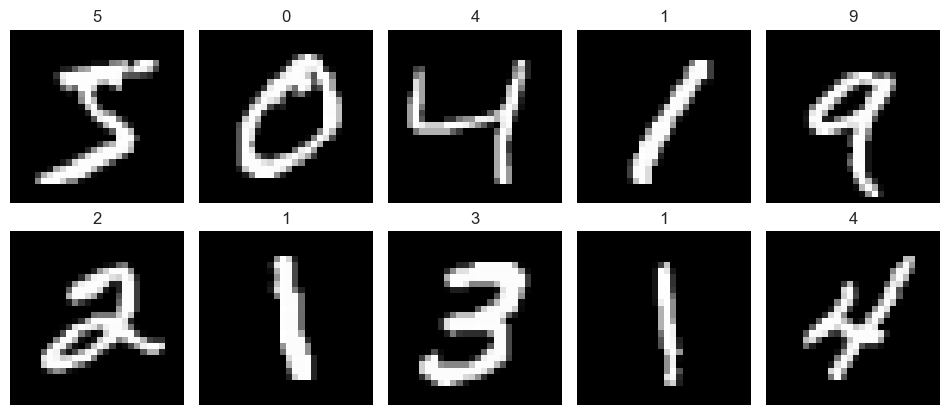

In [16]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

In [ ]:
X_train[9].min()

0

In [ ]:
X_train[9].max()

255

In [ ]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

# MinMaxScaler yapmış oluyoruz aslında burada.
# minimum değerimiz 0 olduğundan Scaler kullanmadan bu şekilde scaling yapabiliriz. elimizdeki data resimde olsa scaling var!

In [ ]:
X_train[9].min()

0.0

In [ ]:
X_train[9].max()

1.0

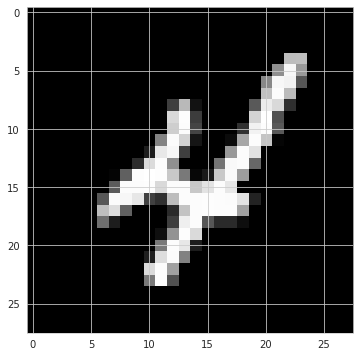

In [ ]:
plt.imshow(X_train[9],cmap='gray')

# scale yaptık ama plt.imshow bunu anlıyor ve bize istediğimiz gibi yine resmi getiriyor.

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape

# biz modelleme aşamasına geçtiğimizde bizden model kanal sayısını isteyecek ondan dolayı burada kanal sayısını da belirteceğiz.
# model kanal sayısını istiyor çünkü ona göre filtreleri vs ayarlıyor.

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# kanal sayısının ne olduğunu da belirttik.

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
# (60000, 10) her bir class'ı 10 elemanlı bir vektör şeklinde ifade edebiliyoruz.

In [ ]:
y_train[9]

# burada 4'ü temsil eden nöron 1 olsun diğerleri 0 olsun bu hale çevirdik to_categorical ile Y_train'i:

4

In [ ]:
Y_train[9]

## kuracağımız mimariye uygun hale getirdik targetımızı.(output layer'a uygun şu anda.)
# fit aşamasında bu Y_train'i kullanacağımıza dikkat edelim.

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

                # 32 filtre olsun bunlar 3*3'lük filtreler olsun -------> filter_size = kernel_size
                # input_shape=(28, 28, 1) yine burada belirtebiliyoruz.

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

## max_pooling2d katmanında eğitilecek bir parametre yoktur burada sadece downsampling oluyor 
## Flatten'da da yine eğitilecek bir parametre yoktur burada sadece ann mimarisine bir hazılık yapıyoruz.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
((3 * 3 * 1) + 1) * 32

320

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)

# cnn'de overfittinge gitme ihtimalimiz çok yüksektir bunun nedeni ; featurelar aslında çok fazla oluyor (feature learning)
# ama onlara karşılılık gelen data sayım o kadar fazla olmuyor genelde. bundan dolayı patience'ı cnn modellerinde düşük seçeriz.

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop]) 


Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.1477 - accuracy: 0.9562 - val_loss: 0.0573 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0490 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0435 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0471 - val_accuracy: 0.9869


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.148,0.956,0.057,0.982
1,0.049,0.984,0.049,0.983
2,0.030,0.991,0.043,0.985
3,0.020,0.993,0.036,0.988
4,0.013,0.996,0.041,0.987


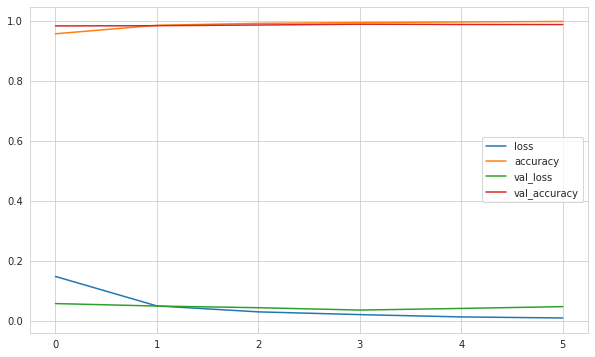

In [ ]:
summary.plot();

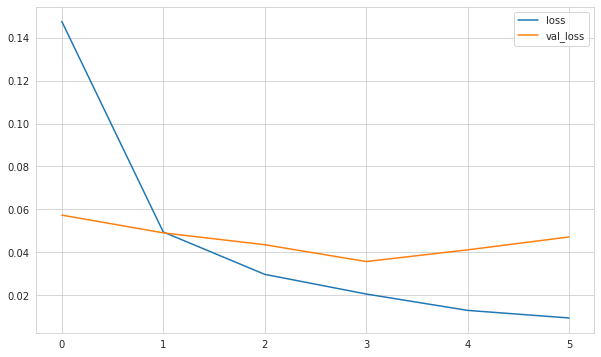

In [ ]:
summary[["loss", "val_loss"]].plot();

# grafikleri böyle ayrı ayrı çizdirmekte fayda var ! : 

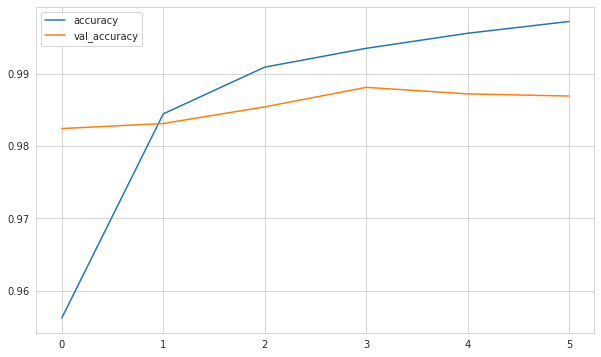

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9881


[0.03561936691403389, 0.988099992275238]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03561936691403389
Test accuracy: 0.988099992275238


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

# her bir resim için 10 boyutlu bir vektör döndürüyor ------> olasılıklar bunlar 

array([[5.70094860e-10, 5.66399239e-09, 2.65640494e-07, ...,
        9.99998927e-01, 3.76896159e-09, 5.53995164e-07],
       [1.12668125e-07, 1.82015140e-06, 9.99998093e-01, ...,
        8.28713875e-10, 8.13337953e-10, 6.38369080e-11],
       [1.85321392e-06, 9.99876142e-01, 1.54481927e-06, ...,
        8.12576473e-05, 2.89995228e-06, 3.84149558e-07],
       ...,
       [2.50471280e-12, 8.79304007e-09, 7.52313004e-11, ...,
        4.61824129e-07, 7.92377705e-07, 6.67627364e-06],
       [2.24222516e-10, 3.33749035e-11, 1.75733195e-11, ...,
        2.00761585e-09, 5.97369262e-06, 3.21021165e-09],
       [6.42332765e-09, 2.42222526e-08, 5.06332398e-09, ...,
        2.39948287e-11, 1.79252115e-08, 8.23904833e-10]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

# ilk data için döndürdüğü olasılıklar : 

array([5.7009486e-10, 5.6639924e-09, 2.6564049e-07, 2.2157427e-07,
       3.1653366e-10, 1.8498732e-11, 7.9136079e-14, 9.9999893e-01,
       3.7689616e-09, 5.5399516e-07], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

# np.argmax ------> bu vektördeki max değerin indexini almak için kullanıyoruz .

7

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

# pred_probların tamamına argmaxla class'larını alıyoruz ki classifaciton reporta bakalım :

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 976    0    1    1    0    1    1    0    0    0]
 [   0 1129    1    1    1    0    2    1    0    0]
 [   1    3 1018    0    1    0    0    6    3    0]
 [   0    0    2 1002    0    2    0    1    3    0]
 [   0    0    0    0  975    0    2    0    0    5]
 [   1    0    0    8    0  877    4    0    2    0]
 [   5    1    0    0    4    2  945    0    1    0]
 [   0    0    5    2    0    0    0 1015    1    5]
 [   5    0    3    1    0    1    1    3  954    6]
 [   2    0    0    1    7    1    0    5    3  990]]


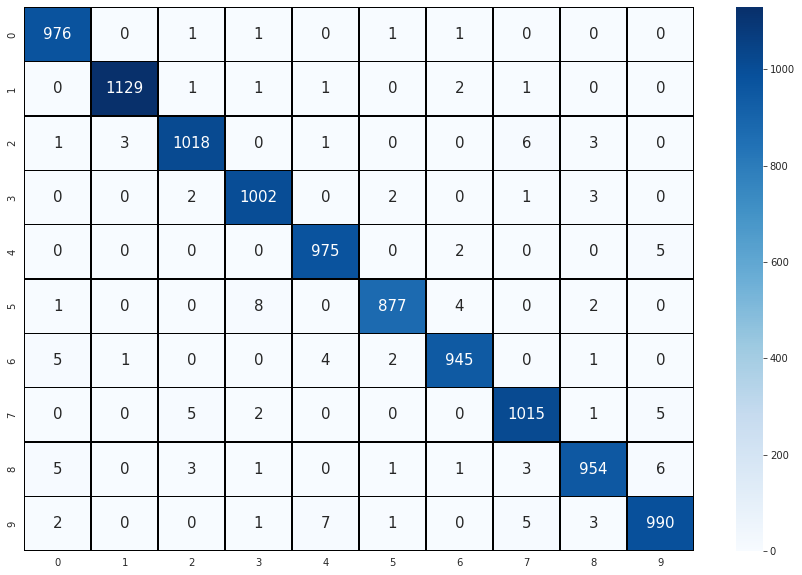

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

# y_test, y_pred'i karşılaştırıp aynı olmayanları almak için np.not_equal'i kullanıyoruz.

In [ ]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

# np.not_equal(y_test, y_pred).sum() ile True'ları toplayıp döndürüyor (toplam hatalı değer)

In [ ]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

# Prediction

In [ ]:
my_number = X_test[3]

In [ ]:
my_number.shape

(28, 28, 1)

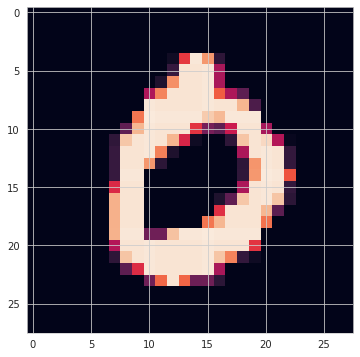

In [ ]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [ ]:
# prediction alacağımız zaman nasıl eğittiysek modeli o şekilde vereceğiz biz nasıl eğittik batch_size'lar halinde eğittik
# ondan dolayı burada da boyutlu hale getirmeliyiz ; ml'de de mesela df şeklinde eğitim yaptığımızdan prediction alacağımız 
# zaman da ona uygun hale getiriyorduk.

In [ ]:
pred_prob = model.predict(my_number.reshape(1,28,28,1)) # tek bir resim olduğunu söylüyoruz.
pred_prob

array([[9.9991286e-01, 8.7628541e-07, 2.0425059e-06, 1.6035476e-07,
        4.8356792e-08, 2.4583287e-07, 1.5273064e-05, 6.4411870e-05,
        6.4506686e-08, 4.1290737e-06]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [ ]:
model.save("cnn-1.h5")

# Using

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[24].shape

In [ ]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

# X_test[24].reshape(1,28,28,1)

In [ ]:
np.argmax(pred)

4

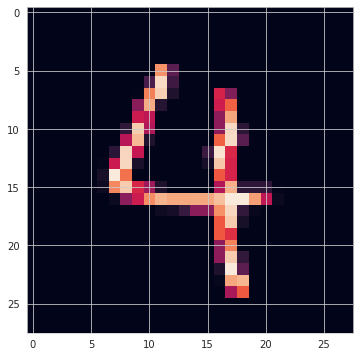

In [ ]:
plt.imshow(X_test[24].reshape(28,28))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___